<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание-1:-Составление-словарей-для-классификации-по-тональности" data-toc-modified-id="Задание-1:-Составление-словарей-для-классификации-по-тональности-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание 1: Составление словарей для классификации по тональности</a></span><ul class="toc-item"><li><span><a href="#Разбейте-всю-коллекцию-отзывов-на-предложения.-Лемматизируйте-все-слова." data-toc-modified-id="Разбейте-всю-коллекцию-отзывов-на-предложения.-Лемматизируйте-все-слова.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Разбейте всю коллекцию отзывов на предложения. Лемматизируйте все слова.</a></span></li><li><span><a href="#Обучите-по-коллекции-предложений-word2vec" data-toc-modified-id="Обучите-по-коллекции-предложений-word2vec-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучите по коллекции предложений word2vec</a></span></li><li><span><a href="#Приведите-несколько-удачных-и-неудачных-примеров-решения-стандартных-текстов-для-word2vec:" data-toc-modified-id="Приведите-несколько-удачных-и-неудачных-примеров-решения-стандартных-текстов-для-word2vec:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Приведите несколько удачных и неудачных примеров решения стандартных текстов для word2vec:</a></span></li><li><span><a href="#Постройте-несколько-визуализаций:" data-toc-modified-id="Постройте-несколько-визуализаций:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Постройте несколько визуализаций:</a></span><ul class="toc-item"><li><span><a href="#TSNE-для-топ-100-(или-топ-500)-слов-и-найдите-осмысленные-кластеры-слов" data-toc-modified-id="TSNE-для-топ-100-(или-топ-500)-слов-и-найдите-осмысленные-кластеры-слов-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>TSNE для топ-100 (или топ-500) слов и найдите осмысленные кластеры слов</a></span></li><li><span><a href="#задайте-координаты-для-нового-пространства-следующим-образом:" data-toc-modified-id="задайте-координаты-для-нового-пространства-следующим-образом:-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>задайте координаты для нового пространства следующим образом:</a></span></li></ul></li></ul></li><li><span><a href="#Задание-2:--Распространение-метки" data-toc-modified-id="Задание-2:--Распространение-метки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 2:  Распространение метки</a></span><ul class="toc-item"><li><span><a href="#Определите-5-8-позитивных-слов-(например,-“быстрый”,-“удобный”)-и-5-8-негативных-слов-(например,“очередь”,-“медленно”).-Эти-слова-будут-основной-будущего-оценочного-словаря." data-toc-modified-id="Определите-5-8-позитивных-слов-(например,-“быстрый”,-“удобный”)-и-5-8-негативных-слов-(например,“очередь”,-“медленно”).-Эти-слова-будут-основной-будущего-оценочного-словаря.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определите 5-8 позитивных слов (например, “быстрый”, “удобный”) и 5-8 негативных слов (например,“очередь”, “медленно”). Эти слова будут основной будущего оценочного словаря.</a></span></li><li><span><a href="#алгоритмы-распространения-метки" data-toc-modified-id="алгоритмы-распространения-метки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>алгоритмы распространения метки</a></span></li></ul></li></ul></div>

# Домашнее задание по теме “Синтаксический анализ”

## Задание 1: Составление словарей для классификации по тональности

При классификации текстов или предложений по тональности необходимо использовать оценочные словари для предметной области, то есть, такие словари, в которых содержатся отрицательные и позитивные слова для какой-то предметной области. Идея подобных словарей основана на следующих наблюдениях: во-первых, для разных товаров используются разные оценочные слова (например бывает “захватывающая книга”, но не бывает “захватывающих лыж”), во-вторых, в контексте разных товаров одни и те же слова могут иметь разную окраску (слово “тормоз” в отзыве на велосипед имеет нейтральную окраску, в отзыве на компьютер – резко негативную, “пыль” в контексте пылесосов – нейтральную, в контексте кофемолок – положительную (“мелкий помол в пыль”)). Еще один пример: "теплое пиво" – это плохо, а "теплый свитер" – это хорошо.

Составление таких словарей вручную – трудоемкий процесс, но, к счастью, его не сложно автоматизировать, если собрать достаточно большие корпуса отзывов. В этом домашнем задании вам предстоит попробовать реализовать один их подходов к составлению оценочных словарей, основанный на статье Inducing Domain-Specific Sentiment Lexicons from Unlabeled Corpora (https://nlp.stanford.edu/pubs/hamilton2016inducing.pdf).

Данные для задания – уже знакомые вам отзывы на банки, собранные с нескольких сайтов Рунета. Отзывы могут быть как положительными (оценка 5), так и отрицательными (оценка 1).

In [1]:
import json

import bz2
from tqdm import tqdm
from scipy import sparse

import pandas as pd
import numpy as np
import nltk

import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import re
from nltk.corpus import stopwords
#from string import punctuation
from pymorphy2 import MorphAnalyzer
ma = MorphAnalyzer()
from collections import Counter
import pickle

Откроем пре-процессеный датафрейм из домашней №1:

In [4]:
import pickle
with open('../../HW_1/Materials/preprocessed/df.pickle' , 'rb') as f:
    df = pickle.load(f)
f.close()

In [6]:
df['city'] = df.city.astype('str').apply(lambda x: x.replace('г. ',''))
df.head()

,bank_name,city,rating_grade,text
0,Бинбанк,Москва,None,Добрый день! Я не являюсь клиентом банка и пор...
1,Сбербанк России,Новосибирск,None,Доброго дня! Являюсь держателем зарплатной кар...
2,Бинбанк,Москва,None,Здравствуйте! Дублирую свое заявление от 03.0...
3,Сбербанк России,Ставрополь,None,Добрый день!! Я открыл расчетный счет в СберБа...
4,ОТП Банк,Челябинск,None,"04.03.2015 г. взяла кредит в вашем банке, заяв..."


### Разбейте всю коллекцию отзывов на предложения. Лемматизируйте все слова.

In [7]:
rus_stopwords = stopwords.words('russian')
rus_word = re.compile('[А-Яа-я]{3,}')
    
def words_only(text): 
    return " ".join([i.lower() for i in rus_word.findall(text)])

def lemmatize(text):
    try:
        return " ".join([ma.parse(i)[0].normal_form for i in rus_word.findall(text) ])  
    except:
        return " "
    
def lemmatize_noun(text ):
    try:
        return [ma.parse(i)[0].normal_form for i in text if {'NOUN'} in ma.parse(i)[0].tag  ]  
    except:
        return " "

def remove_stopwords(text, mystopwords = rus_stopwords):
    try:
        return " ".join([i for i in text.split() if i not in mystopwords])
    except:
        return [i for i in text if i not in mystopwords]
    
def preprocess(text):
    return remove_stopwords(lemmatize(words_only(text)))

In [ ]:
df['text_processed'] = df.text.astype('str').apply(preprocess)

А можно проще, загрзить процессеный датафрейм из первой домашней:

In [100]:
with open('../../HW_1/Materials/processed/df.pickle' , 'rb') as f:
    df = pickle.load(f)
f.close()

In [4]:
df.head()

,bank,city,rating,text,text_processed
0,Бинбанк,Москва,None,Добрый день! Я не являюсь клиентом банка и пор...,добрый день являться клиент банк поручитель кр...
1,Сбербанк России,Новосибирск,None,Доброго дня! Являюсь держателем зарплатной кар...,добрый день являться держатель зарплатный карт...
2,Бинбанк,Москва,None,Здравствуйте! Дублирую свое заявление от 03.0...,здравствуйте дублировать свой заявление можайс...
3,Сбербанк России,Ставрополь,None,Добрый день!! Я открыл расчетный счет в СберБа...,добрый день открыть расчётный счёт сбербанк ли...
4,ОТП Банк,Челябинск,None,"04.03.2015 г. взяла кредит в вашем банке, заяв...",взять кредит ваш банк заявить сумма рубль год ...


### Обучите по коллекции предложений word2vec

In [3]:
from gensim.models.word2vec import Word2Vec

In [7]:
result = []

for i in tqdm(df.text_processed): 
    result.append( [j for j in i.split() ])
    

100%|███████████████████████████████| 153499/153499 [00:06<00:00, 25040.59it/s]


In [8]:
# Word2Vec
word_to_vec_text = Word2Vec(result, workers=4, vector_size=300, min_count=3, window=5, epochs=50)

In [9]:
word_to_vec_text.wv.index_to_key[:5]

['банк', 'карта', 'это', 'деньга', 'день']

In [10]:
print( word_to_vec_text.wv['банк'][:30])
word_to_vec_text.wv.most_similar('вклад')

[ 0.2532863  -0.53095716 -0.73003477 -0.08672321  0.32542422 -1.0048007
 -1.0208464   0.92761743 -0.40378445  0.93593127  0.4244592   0.03597893
  0.2463437  -0.5869113   1.525071   -0.47726232  0.09651468 -1.9334999
 -0.538103    0.9582507   0.5064818   0.733267   -0.10928251 -0.5830959
  0.56816155 -0.8980207  -0.20123358  1.6486887   0.20770362  0.04484551]


[('депозит', 0.9131909608840942),
 ('депозитный', 0.5788779258728027),
 ('капитализация', 0.5612224340438843),
 ('рантье', 0.4895908832550049),
 ('доходный', 0.4822109639644623),
 ('смартвклад', 0.47515571117401123),
 ('вкладчик', 0.46517467498779297),
 ('накопительный', 0.46100401878356934),
 ('востребование', 0.45593276619911194),
 ('супервклад', 0.43395712971687317)]

совпадает отлично эмбединг закончили.


In [19]:
#сохраняемся
word_to_vec_text.save("./processed/word2vec.model")

In [13]:
# если вдруг нужно будет загрузить модель:
word_to_vec_text = Word2Vec.load("./processed/word2vec.model")

Keyed Vectors

In [4]:
from gensim.models import KeyedVectors

In [17]:
word_vectors = word_to_vec_text.wv
word_to_vec_text.wv.save("./processed/word2vec.wordvectors.bin")

In [5]:
# Load a word2vec model stored in the C *binary* format.
#from gensim.test.utils import datapath

word_vectors = KeyedVectors.load("./processed/word2vec.wordvectors.bin")

### Приведите несколько удачных и неудачных примеров решения стандартных текстов для word2vec:
-  тест на определение ближайших слов
-  тест на аналогии (мужчина – король : женщина – королева)
-  тест на определение лишнего слова.

In [7]:
# определение ближайших слов
word_vectors.most_similar('доверие')

[('репутация', 0.5111017227172852),
 ('авторитет', 0.4990636110305786),
 ('недоверие', 0.4884306788444519),
 ('оптимизм', 0.47003859281539917),
 ('имидж', 0.46943604946136475),
 ('лояльность', 0.43743446469306946),
 ('доверять', 0.4208633303642273),
 ('надёжность', 0.4099663496017456),
 ('отторжение', 0.4051988422870636),
 ('привлекательность', 0.3944292962551117)]

In [24]:
word_vectors.most_similar('мошейник')

[('мошенник', 0.36048179864883423),
 ('фармс', 0.29631564021110535),
 ('сбербанк', 0.2957094609737396),
 ('безобразно', 0.2668776214122772),
 ('мошейничество', 0.25321322679519653),
 ('фишинга', 0.2508171796798706),
 ('получаться', 0.24909177422523499),
 ('ненадёжный', 0.24764330685138702),
 ('бербанк', 0.2470119297504425),
 ('социально', 0.24637126922607422)]

In [25]:
word_vectors.most_similar('акция')

[('спецпредложение', 0.5400211215019226),
 ('розыгрыш', 0.5343733429908752),
 ('лотерея', 0.49708813428878784),
 ('промоакция', 0.4558902978897095),
 ('подарок', 0.45523005723953247),
 ('групон', 0.4548380970954895),
 ('конкурс', 0.44883468747138977),
 ('скидка', 0.4367466866970062),
 ('акционный', 0.4233836233615875),
 ('льготный', 0.42160287499427795)]

In [26]:
word_vectors.most_similar('открыть')

[('открывать', 0.8290103673934937),
 ('открытие', 0.6657145023345947),
 ('открываться', 0.6279476284980774),
 ('пополнить', 0.6213948726654053),
 ('завести', 0.6172443628311157),
 ('закрыть', 0.6067850589752197),
 ('отрыть', 0.5748055577278137),
 ('откроить', 0.5569126605987549),
 ('открытый', 0.5497719645500183),
 ('закрывать', 0.5257010459899902)]

In [27]:
word_vectors.most_similar('дистанционно')

[('удалённый', 0.5599509477615356),
 ('дистанционный', 0.43692028522491455),
 ('интернет', 0.40190306305885315),
 ('самостоятельно', 0.3962324857711792),
 ('оперативно', 0.3820246756076813),
 ('лайна', 0.3429613411426544),
 ('удалой', 0.34005433320999146),
 ('онлайн', 0.31442224979400635),
 ('инет', 0.3086392879486084),
 ('банкинг', 0.3045424818992615)]

In [29]:
# тест на аналогии (мужчина – король : женщина – королева)

#     positive — вектора, которые мы складываем
#     negative — вектора, которые вычитаем

#     Что получится, если вычесть из вклада деньга и прибавить банк ?

word_vectors.most_similar(positive=['вклад', 'банк'], negative=['деньга']) # должно получиться что то похожее на 'кредит'

[('депозит', 0.4709746539592743),
 ('росинтербанк', 0.3955385386943817),
 ('вкладчик', 0.3790328800678253),
 ('соблазниться', 0.3627621531486511),
 ('мособлбанк', 0.3498727083206177),
 ('несгораемый', 0.3463003635406494),
 ('бпф', 0.33915600180625916),
 ('рантье', 0.3381029963493347),
 ('капитализация', 0.3318580687046051),
 ('супервклад', 0.3262217938899994)]

In [30]:
#     Что получится, если вычесть из банк приехать и прибавить карта ?

word_vectors.most_similar(positive=['банк', 'карта'], negative=['приехать']) # должно получиться что то похожее на 'дистанционно'

[('карточка', 0.4120981693267822),
 ('ситибанк', 0.3923100233078003),
 ('кредитка', 0.3897530138492584),
 ('дебетовый', 0.3597238063812256),
 ('промсвязьбанк', 0.3544592559337616),
 ('мастеркард', 0.3400324285030365),
 ('банкинг', 0.33443084359169006),
 ('брс', 0.3339383602142334),
 ('альф', 0.3260098993778229),
 ('псб', 0.3251495659351349)]

In [31]:
#     Что получится, если вычесть из пригласительный приехать и прибавить акция ? 

word_vectors.most_similar(positive=['пригласительный', 'акция'], negative=['приехать']) # должно получиться что то похожее на кашу

[('розыгрыш', 0.46148964762687683),
 ('спецпредложение', 0.4590436518192291),
 ('групон', 0.4401020109653473),
 ('лотерея', 0.4320741891860962),
 ('скидка', 0.4187765419483185),
 ('конкурс', 0.4146120250225067),
 ('бонус', 0.4080039858818054),
 ('лото', 0.39448413252830505),
 ('промоакция', 0.3792937695980072),
 ('выигрыш', 0.37553757429122925)]

In [36]:
# тест на определение лишнего слова
word_vectors.doesnt_match('средство санкция наплевать скидка'.split())

'скидка'

In [33]:
word_vectors.doesnt_match('открыть карта участие приехать наплевать акция'.split())

'наплевать'

In [37]:
word_vectors.doesnt_match('приехать обращаться выигрыш дистанционно'.split())

'выигрыш'

In [38]:
word_vectors.similarity('карта', 'шапка')

-0.073333375

### Постройте несколько визуализаций:
#### TSNE для топ-100 (или топ-500) слов и найдите осмысленные кластеры слов

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [41]:
# соберем только 500 топ по частоте применения слов
counter = {} # создадим словарь с частотой каждого слова

for i in tqdm(result):
    for j in i:
        if j not in counter.keys():
            counter[j] = 1
        else:
            counter[j] +=1
counter = dict(sorted( counter.items(), key= lambda x: x[1] ,reverse=True ) )

100%|███████████████████████████████| 153499/153499 [00:12<00:00, 12017.44it/s]


In [43]:
most_common_500_words = list(counter.keys())[:500]

In [44]:
# уменьшим размерность чтобы оставить 90% дисперсии:
for i in tqdm(range(10,300,5)):
    svd = TruncatedSVD(n_components=i,n_iter=5)
    svd.fit( word_vectors[most_common_500_words] )
    a = svd.explained_variance_ratio_.sum()
    if a > .9:break
a

 47%|███████████████████▌                      | 27/58 [00:02<00:02, 11.38it/s]


0.9042083

In [45]:
svd.n_components

145

Можно уменьшить размерность каждого слова из 300 признаков в 145

In [47]:
word_vectors[most_common_500_words].shape

(500, 300)

In [48]:
reduced_vectors = svd.transform(word_vectors[most_common_500_words])
reduced_vectors.shape

(500, 145)

In [ ]:
# еще сжиаем для визуализации:
reduced_vectors_afterTSNE = TSNE(n_components=2,metric='cosine').fit_transform(reduced_vectors)

In [79]:
visualisation_df = pd.DataFrame({'X': reduced_vectors_afterTSNE[:, 0], 'Y': reduced_vectors_afterTSNE[:, 1]})

In [56]:
from sklearn.cluster import DBSCAN

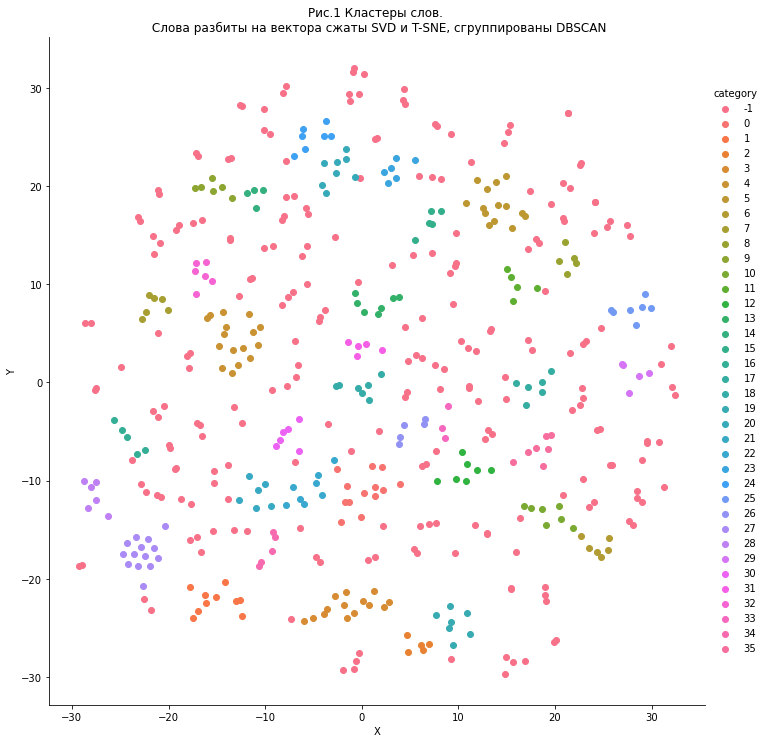

In [83]:
# кластеризовывать будет DBSCAN
dbb = DBSCAN(eps=2.3, n_jobs=-1)
visualisation_df['category'] = dbb.fit_predict(reduced_vectors_afterTSNE)

sns.FacetGrid(visualisation_df, height=10,hue='category').map(plt.scatter, "X", "Y").add_legend()
plt.title('Рис.1 Кластеры слов. \n Слова разбиты на вектора сжаты SVD и T-SNE, сгруппированы DBSCAN');

In [82]:
visualisation_df['word'] = most_common_500_words
visualisation_df.head(3)

,X,Y,category,word
0,24.723335,5.582405,-1,банк
1,24.126062,18.343683,-1,карта
2,-1.494846,-10.559139,0,это


In [84]:
# отсортируем по категориям 
visualisation_df.sort_values(by='category',inplace=True)

на рис.1 четко различима кластера 27,3. Посмотрим какие слова в этих кластерах:

In [86]:
visualisation_df.loc[visualisation_df['category']==27,'word'].to_list()

['декабрь',
 'ноябрь',
 'февраль',
 'май',
 'июнь',
 'август',
 'март',
 'июль',
 'очередной',
 'январь',
 'сентябрь',
 'число',
 'октябрь',
 'апрель']

Кластер 27 - дата, месяц

In [87]:
visualisation_df.loc[visualisation_df['category']==3,'word'].to_list()

['девушка',
 'представитель',
 'оператор',
 'кассир',
 'сотрудница',
 'специалист',
 'менеджер',
 'операционист',
 'касса',
 'руководство',
 'руководитель',
 'сотрудник',
 'работник',
 'операционистка']

Кластер 3- что то связанное с "операционистами"

In [88]:
visualisation_df.loc[visualisation_df['category']==1,'word'].to_list()

['время',
 'пора',
 'минута',
 'рабочий',
 'неделя',
 'час',
 'месяц',
 'день',
 'год',
 'сутки']

In [89]:
visualisation_df.loc[visualisation_df['category']==2,'word'].to_list()

['филиал', 'туда', 'офис', 'лично', 'отделение']

In [90]:
visualisation_df.loc[visualisation_df['category']==4,'word'].to_list()

['сообщить',
 'выяснить',
 'объяснять',
 'уточнить',
 'спрашивать',
 'ответить',
 'разобраться',
 'сообщать',
 'сказать',
 'подтвердить',
 'отвечать',
 'рассказать',
 'говорить',
 'спросить',
 'объяснить',
 'узнать']

#### задайте координаты для нового пространства следующим образом: 
одна ось описывает отношение "плохо – хорошо", вторая – "медленно – быстро" и найдите координаты названий банков в этих координатах. Более формально: берем вектор слова "хорошо", вычитаем из него вектор слова "плохо", получаем новый вектор, который описывает разницу между хорошими и плохими словами. Берем вектор слова "сбербанк" и умножаем его на этот новый вектор – получаем координату по первой оси. Аналогично – для второй оси. Две координаты уже можно нарисовать на плоскости.

__Я буду делать по-другому, а именно, буду делать так:__

буду сравнивать куда __направлен (ключевое слово)__ вектор "сбербанк", в сторону слова "хорошо" или в сторону слова "плохо" .

1. для этого мне нужно создать __такой вектор__, который при 0 градусов (или cos = 1) будет направлен в сторону слова "хорошо", а при  180 градусов (или cos = -1) будет направлен в сторону слова "плохо".

1. тогда отмечая угол между новым ветором и вектором слова "сбербанк" я буду знать куда направлен вектор слова "сбербанк"  (в сторону слова "хорошо" или в сторону слова "плохо")

1. Полученный угол будет углом, показывающим в какую сторону вектор "сбербанк" отклонен больше (в сторону слова "хорошо" или в сторону слова "плохо")

Новый вектор будет ни чем иным, как __суммой вектора слова "хорошо" и вектора слова  (-) "плохо"__ или согласно правилу вычитания векторов _разницей между вектором слова "хорошо" и вектором слова "плохо"_

In [251]:
diff_good_bad = word_vectors['супер']- word_vectors['плохо'] # слова "хорошо" нет в корпусе
diff_fast_slow = word_vectors['медленно']- word_vectors['быстро'] 

In [216]:
def cosine(alpha,betta):
    return np.dot(alpha,betta)/( np.dot(alpha,alpha)*np.dot(betta,betta) )**.5 

In [252]:
%%time
cosine(diff_good_bad,word_vectors['сбербанк'] )

Wall time: 0 ns


-0.022731468975392945

In [253]:
%%time

#А можно воспользоваться функцией которая есть в генсим:
word_vectors.cosine_similarities(diff_good_bad,[word_vectors['сбербанк'] ] )

Wall time: 0 ns


array([-0.02273147], dtype=float32)

Ячейка генсим выполняется дольше по времени, значит будем использовать numpy.

Сначала определим банки для этого отсортируем датафрейм по банкам с максимальной средней оценкой и возьмем 7 самых положительнх банков, а также 7 самый частых по отзывам банков:

In [186]:
ratin = pd.DataFrame(df.dropna().groupby(by='bank').rating.sum() / df.dropna().groupby(by='bank').rating.count())#.mean() #.count() #value_counts()#(
ratin['count'] = pd.Series(df.dropna().groupby(by='bank').rating.count())

In [191]:
ratin.sort_values(by= 'rating', ascending=False,inplace=True)
top_banks_rating = ratin[ratin['count']>5].index[:7]

ratin.sort_values(by= 'count', ascending=False,inplace=True)
top_banks_count = ratin[ratin['count']>5].index[:7]

top_banks_rating, top_banks_count

(Index(['Росавтобанк', 'Эргобанк', 'Экспресс-Кредит', 'Соверен Банк',
        'Газэнергопромбанк', 'Лефко-Банк', 'Айви Банк'],
       dtype='object', name='bank'),
 Index(['Сбербанк России', 'Альфа-Банк', 'ВТБ 24', 'Русский Стандарт',
        'Хоум Кредит Банк', 'Национальный Банк «Траст»', 'Ситибанк'],
       dtype='object', name='bank'))

In [289]:
# Теперь соберем все вместе:
top_bank_list = [i.lower().replace('-','').replace('национальный банк «траст»','траст банк') for i in top_banks_rating.append(top_banks_count) ]#, top_banks_count
top_bank_list

['росавтобанк',
 'эргобанк',
 'экспресскредит',
 'соверен банк',
 'газэнергопромбанк',
 'лефкобанк',
 'айви банк',
 'сбербанк россии',
 'альфабанк',
 'втб 24',
 'русский стандарт',
 'хоум кредит банк',
 'траст банк',
 'ситибанк']

In [290]:
# отметим каждый банк в новой координатно плоскости:
bank_list_good_or_bad = []
bank_list_fast_or_slow = []

for i in top_bank_list:
    try:
        bank_list_good_or_bad.append( cosine(diff_good_bad, word_vectors[i.split()[0]] ) )
        bank_list_fast_or_slow.append( cosine(diff_fast_slow, word_vectors[i.split()[0]] ) )
    except:
        bank_list_good_or_bad.append( np.nan )
        bank_list_fast_or_slow.append( np.nan )

In [291]:
# подготовим для визуализации и визуализируем:
df_vis = pd.DataFrame(data=bank_list_good_or_bad, index=top_bank_list,columns=['good_or_bad'])
df_vis['fast_or_slow'] = bank_list_fast_or_slow

In [294]:
df_vis.dropna(inplace=True)
df_vis

,good_or_bad,fast_or_slow
росавтобанк,0.096473,-0.145953
соверен банк,0.083512,-0.145443
газэнергопромбанк,-0.055228,-0.025259
сбербанк россии,-0.022731,0.017162
альфабанк,0.062849,-0.017278
втб 24,0.078864,-0.058463
русский стандарт,-0.022506,-0.037855
хоум кредит банк,0.042232,-0.092259
траст банк,0.047618,-0.067821
ситибанк,0.069889,-0.038112


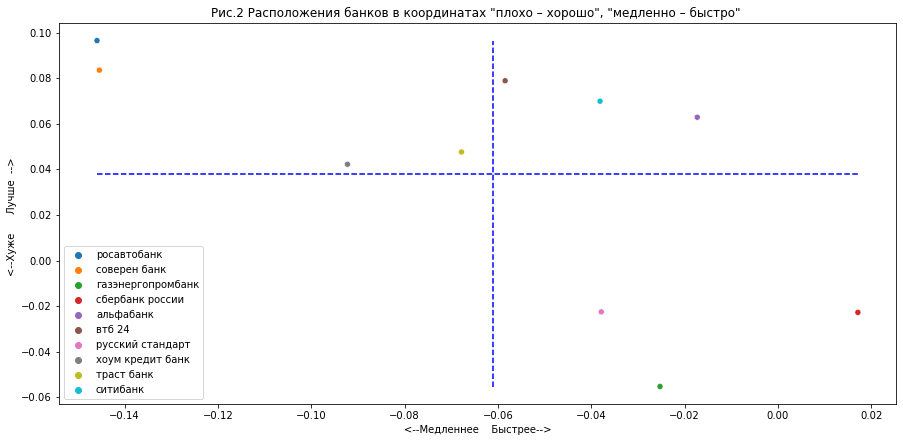

In [319]:
plt.figure(figsize=(15,7))
sns.scatterplot( x= 'fast_or_slow',y='good_or_bad',data=df_vis,hue=df_vis.index )
plt.plot(np.linspace(df_vis.fast_or_slow.mean(),df_vis.fast_or_slow.mean()),np.linspace(df_vis.good_or_bad.min(),df_vis.good_or_bad.max()),'b--')
plt.plot(np.linspace(df_vis.fast_or_slow.min(),df_vis.fast_or_slow.max()),np.linspace(df_vis.good_or_bad.mean(),df_vis.good_or_bad.mean()),'b--')

plt.xlabel('<--Медленнее    Быстрее-->')
plt.ylabel('<--Хуже      Лучше  -->  ')

plt.title('Рис.2 Расположения банков в координатах "плохо – хорошо", "медленно – быстро" ');

Судя по рис.2, самым хорошим по метрикам "быстро-медленно", "лучше-хуже" банком можно определить банки:
- "Альфа банк"
- "ВТБ"
- "Сити Банк"

, так как он расположены в верхнем правом квадрате вышеуказанных метрик.  

## Задание 2:  Распространение метки
### Определите 5-8 позитивных слов (например, “быстрый”, “удобный”) и 5-8 негативных слов (например,“очередь”, “медленно”). Эти слова будут основной будущего оценочного словаря. 

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

5-8 позитивных слов и 5-8 негативных слов нам даст случайный лес:

Обучим случайный лес на Tf-idf и достанем самые существенные(ключевые) слова, на которые опирается лес при прогнозировании класса. 

Эти слова отберем на положительные и отрицательные.

In [102]:
new_df = pd.concat([df.dropna().loc[df.rating==1].iloc[:1000], df.dropna().loc[df.rating==5].iloc[:1000]] )

In [105]:
rf_pipe = Pipeline([ 
    ('tfidf', TfidfVectorizer(ngram_range=(1,1))), 
    ('rf', RandomForestClassifier(n_jobs=-1))
])

X = new_df.text_processed
y = new_df.rating.astype(int)

rf_pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rf', RandomForestClassifier(n_jobs=-1))])

In [106]:
df_words = pd.Series(data=rf_pipe['rf'].feature_importances_,index=rf_pipe['tfidf'].get_feature_names_out())
df_words.sort_values(ascending=False,inplace=True)
df_words.head(20)

спасибо          0.021193
благодарность    0.014120
очень            0.013830
быстро           0.012845
май              0.009649
приятно          0.009600
ответ            0.007645
хороший          0.007357
вклад            0.006777
мочь             0.006453
почему           0.005966
положительный    0.005698
всё              0.005517
работа           0.005506
оперативно       0.005477
должный          0.005347
звонить          0.005110
весь             0.005053
довольный        0.004989
хотеть           0.004986
dtype: float64

In [107]:
# Эти слова деревья считают важными:
df_words.head(100).index

Index(['спасибо', 'благодарность', 'очень', 'быстро', 'май', 'приятно',
       'ответ', 'хороший', 'вклад', 'мочь', 'почему', 'положительный', 'всё',
       'работа', 'оперативно', 'должный', 'звонить', 'весь', 'довольный',
       'хотеть', 'апрель', 'отзыв', 'сказать', 'обслуживание', 'заявление',
       'номер', 'открывать', 'выразить', 'сбербанк', 'деньга', 'вежливый',
       'очередь', 'отметить', 'написать', 'приятный', 'банк', 'решить',
       'помочь', 'жалоба', 'никто', 'дать', 'поблагодарить', 'огромный',
       'просить', 'карта', 'удобный', 'хотеться', 'говорить', 'день', 'сумма',
       'доброжелательный', 'сообщить', 'средство', 'клиент', 'высокий',
       'неделя', 'занять', 'ваш', 'банкомат', 'администратор', 'рассказать',
       'понравиться', 'вопрос', 'внимательный', 'сегодня', 'плюс', 'звонок',
       'минута', 'сообщение', 'впечатление', 'кредит', 'большой', 'улыбка',
       'это', 'ответить', 'тинькофф', 'сразу', 'месяц', 'выдать', 'прийти',
       'время', 'пытать

In [10]:
positive_words = ['быстро', 'спасибо', 'приятно', 'очень', 'благодарность', 'довольный','хороший', 'вежливый','приятный','понравиться' ]
negative_words = ['заявление', 'почему' , 'очередь','проблема','никто','ждать','просить','жалоба','написать' ]

Посмотрим что думает об этом shap

In [17]:
import shap

In [34]:
X_for_shap = rf_pipe['tfidf'].transform(X)

<3000x15602 sparse matrix of type '<class 'numpy.float64'>'
	with 287484 stored elements in Compressed Sparse Row format>

In [ ]:
shap_values = shap.TreeExplainer(rf_pipe['rf'] ).shap_values(X_for_shap.toarray(),check_additivity=False)

In [ ]:
# А shap ничего не сказал - но очень долго думал..

In [ ]:
shap.summary_plot(shap_values, X_for_shap.toarray() )

### алгоритмы распространения метки

Пусть позитивному классу соответствует метка 1, негативному – -1. Пометьте выбранные слова в лексическом графе соответствующими метками. Запустите любой известный вам метод распространения метки (Label Propogation) в лексическом графе. На выходе метода распространения ошибки должны быть новые слова, помеченные метками 1 и -1 – это и есть искомые оценочные слова.

Алгоритмы распространения метки устроены примерно так: пусть мы находимся в выршине, помеченном +1. С какой-то вероятностью мы переносим эту метку на соседние узлы. С меньшей вероятностью переносим ее на вершины на расстоянии два. В конце распространения метки, часть вершин оказывается помечена меткой +1, часть – -1, большая часть остается без метки.

Рекомендуемые алгоритмы распространения метки:

1. graphlab.label_propagation (graphlab доступен бесплатно по образовательной лицензии)
2. sklearn.semi_supervised.LabelPropagation
3. sklearn.semi_supervised.LabelSpreading

Пример построения графа: см. ноутбук, размещенный в текущей папке репозитория

In [7]:
from sklearn.semi_supervised import LabelSpreading

In [8]:
ssl = LabelSpreading(n_jobs=-1)

In [9]:
# Уменьшим размерность векторов слов:
svd = TruncatedSVD(n_components=145,n_iter=5)
reduced_vectors = svd.fit_transform( word_vectors.vectors )

Созддадим массив классов:

In [11]:
positive_words_index = [word_vectors.get_index(i) for i in positive_words]
negative_words_index = [word_vectors.get_index(i) for i in negative_words]
positive_words_index, negative_words_index

([244, 162, 611, 36, 950, 512, 124, 333, 656, 672],
 [16, 54, 65, 40, 113, 73, 78, 275, 39])

In [12]:
y = np.full((42080,), fill_value=-1)

In [13]:
y[positive_words_index] = 1
y[negative_words_index] = 0

In [14]:
try:
    ssl.fit(reduced_vectors,y)
    !telegram-send "Job's_Done"
except:
    !telegram-send "Error"

Нельзя просто так ~~взять кольцо~~ построить распростронение метки методами SVD + sklearn.  

Придется строить граф..

In [23]:
import igraph as ig

In [7]:
graph = ig.Graph(directed=True)
for word in word_vectors.key_to_index.keys():
    graph.add_vertex(word)
    
    
    
for word in tqdm(word_vectors.key_to_index.keys()) :
    node = graph.vs.select(name = word).indices[0]
    similar_words = word_vectors.most_similar(word, topn=5)
    for sim in similar_words:
        word1 = sim[0]
        val  = sim[1]
        new_node = graph.vs.select(name = word1).indices[0]
        graph.add_edge(node, new_node, weight = val)

100%|██████████████████████████████████| 42080/42080 [1:14:11<00:00,  9.45it/s]


In [9]:
# save
graph.write_pickle('./processed/word_vectors_graph.pickle')

In [24]:
g_1 = ig.Graph.Read_Pickle('./processed/word_vectors_graph.pickle')

Создаем метку 'label' смысл которой - принадлежность к классу положительных или отрицательных слов, "1" и "0" соотвтественно, "-1" - класс не определен

In [34]:
g_1.vs['label'] = [-1]*len(g_1.vs)

In [40]:
for i in positive_words:
    g_1.vs.select(name=i)['label']=1
    
for i in negative_words:
    g_1.vs.select(name=i)['label']=0

label_propagation

In [45]:
# label_propagation
targets = g_1.community_label_propagation(weights='weight', initial='label')

In [98]:
print('Метод "label_propagation" кластеризовал: \n Положительных слов = %d, \n Отрицательных слов = %d'% (targets.size(1),targets.size(0) ) )

Метод "label_propagation" кластеризовал: 
 Положительных слов = 18144, 
 Отрицательных слов = 9100


Посмотрим на слова:

In [78]:
df_label_propagation = pd.DataFrame(g_1.vs['name'],columns=['word'])
df_label_propagation['label'] = targets.membership

In [79]:
a = {0:'-', #'negative_word',
    1:'+', #'positive_word',
    -1:'UNK'}

df_label_propagation['label'] = df_label_propagation.label.map(a)
df_label_propagation.head(3)

,word,label
0,банк,-
1,карта,+
2,это,UNK


In [89]:
df_label_propagation.sort_values(by='label',inplace=True)
df_label_propagation.head()

,word,label
21039,колокол,+
31208,акопов,+
31209,подобру,+
13652,турпоездка,+
31210,директриса,+


Момент истины - какие же слова нашел метод?

In [87]:
# 50 положительных слов
label_propagation_positive_words = df_label_propagation.loc[df_label_propagation.label=='+','word'].to_list()
' , '.join(label_propagation_positive_words[:50])

'карта , день , всё , кредит , отделение , сотрудник , мочь , счёт , сумма , заявление , год , вопрос , время , получить , кредитный , офис , телефон , платёж , договор , дать , номер , звонить , сбербанк , позвонить , месяц , написать , проблема , работать , рубль , работа , документ , ситуация , звонок , прийти , решить , говорить , человек , хотеть , операция , почему , должный , информация , сделать , срок , заявка , знать , просто , обслуживание , очередь , минута'

In [86]:
# 50 отрицательных слов
label_propagation_negative_words = df_label_propagation.loc[df_label_propagation.label=='-','word'].to_list()
' , '.join(label_propagation_negative_words[:50])

'банк , деньга , клиент , свой , сказать , ещё , весь , ответ , вклад , ваш , банкомат , очень , средство , смс , услуга , большой , первый , сайт , новый , интернет , никакой , сообщить , ответить , следующий , хотя , система , денежный , отзыв , хороший , итог , узнать , касса , оказаться , добрый , самый , последний , второй , спасибо , письмо , линия , снова , либо , отвечать , страховка , поэтому , полный , результат , уточнить , сообщение , терминал'